# P1 - Statistics 

**Due: Fri. 10/2/20, 11:59pm**

This project is intended to give you experience with descriptive and inferential statistics. 





In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 
import seaborn as sns
import statistics as stats

## Part 1 - Descriptive Statistics 

This problem will use data from the Department of Transportation's Transit Statistics. The data was collected from:  
https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236
Information on the variables can be found there in the Glossary.  You will use the file `flights-jan2019-ORD-MSP.csv`, includes flight information for all flights arriving or leaving Chicago O'hare (ORD) and Minneapolis (MSP) airports in January 2019.   

Information about airports is also available in the file `airports.dat`.  This data was collected from [Open Flights](https://openflights.org/data.html).  

Disclaimer: There are additional functions to help deal with time data that is not presented or expected in the problems asked below.

In [148]:
flights = pd.read_csv("data/flights-jan2019-ORD-MSP.csv", 
                      dtype = {'CRS_ARR_TIME': 'f8', 'CRS_DEP_TIME': 'f8'})
flights.head()

,YEAR,MONTH,DAY_OF_MONTH,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME
0,2019,1,10,2019-01-10,OO,N938SW,5011,ORD,FWA,1605.0,1629.0,1816.0,1827.0
1,2019,1,10,2019-01-10,OO,N908SW,5012,ORD,MBS,1400.0,1403.0,1616.0,1626.0
2,2019,1,10,2019-01-10,OO,N980SW,5014,ORD,LWB,1415.0,1405.0,1720.0,1703.0
3,2019,1,10,2019-01-10,OO,N701BR,5023,ORD,SLN,1007.0,1007.0,1213.0,1234.0
4,2019,1,10,2019-01-10,OO,N471CA,5030,ORD,SPI,1400.0,1349.0,1504.0,1442.0


In [149]:
airports_cols = [
    'openflights_id',
    'name',
    'city',
    'country',
    'iata',
    'icao',
    'latitude',
    'longitude',
    'altitude',
    'tz',
    'dst',
    'tz_olson',
    'type',
    'airport_dsource'
]

airports = pd.read_csv("data/airports.dat", names=airports_cols)
airports.head()

,openflights_id,name,city,country,iata,icao,latitude,longitude,altitude,tz,dst,tz_olson,type,airport_dsource
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby,NaN,NaN
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby,NaN,NaN
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby,NaN,NaN
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby,NaN,NaN
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby,NaN,NaN


### Q1. (10 pts) - Extract Time Information

Both the departure and arrival were read in a floating-point numbers. Write two functions, `extract_hour` and `extract_mins` that converts military time to hours and minutes, respectively. Hint: You may want to use modular arithmetic and integer division.


In [165]:
def extract_hour(time):
    """
    Extract hour information from the time given in military format time.

    Input:
        time (float64): array of time given in military format.  
          Takes on values in 0.0-2359.0 due to float64 representation.
 
    Returns:
        array (float64): array of input dimension with hour information.  
          Should only take on integer values in 0-23
    
    Example: 1:03pm is will resulting 01
    >>> extract_hour(1303.0)
    01.0
    """
    # YOUR CODE HERE
    adjusted_time = (time/100)
    result = (adjusted_time.apply(math.floor))*1.0
    return result

In [166]:
def extract_mins(time):
    """
    Extract minute information from the time given in military format time.

    Input:
        time (float64): array of time given in military format.  
          Takes on values in 0.0-2359.0 due to float64 representation.
    
    Returns:
        array (float64): array of input dimension with hour information.  
          Should only take on integer values in 0-59
    
     Example: 1:03pm is will resulting 03
    >>> extract_mins(1303.0)
    03.0
    
    """
    # YOUR CODE HERE
    # Getting hours
    hours_dot_minute = time/100
    hours = hours_dot_minute.apply(math.floor)
    result = (hours_dot_minute - hours)*100
    return result

### Q2. (10 pts) - Filter Delayed Flights

Using your two functions above, filter the `flights` data for flights that departed 15 or more minutes later than scheduled.  You do not need to worry about flights that were delayed to the next day for this question.

To help answer this question, implement the following helper functions: `convert_to_minofday` and `calc_time_diff`.

In [152]:
def convert_to_minofday(time):
    """
    Converts military time (Hour and Minute) to minute of day.
    
    Input:
       time (float64): array of time given in military format.  
          Takes on values in 0.0-2359.0 due to float64 representation.
    
    Returns:
        array (float64): array of input dimension with minute of day
    
     
    Example: 1:03pm is converted to 783.0
    >>> convert_to_minofday(1303.0)
    783.0
    """
    # YOUR CODE HERE
    hours = extract_hour(time)
    hours_in_minutes = hours * 60
    minutes = extract_mins(time)
    min_of_day = hours_in_minutes + minutes
    return min_of_day


def calc_time_diff(x, y):
    """ 
    Calculate the time difference between Y and X 

    Input:
        x (float64): array of scheduled time given in military format.  
          Takes on values in 0.0-2359.0 due to float64 representation.
        y (float64): array of same dimensions giving actual time
        
    Returns:
        array (float64): array of input dimension with delay time
        
        
    Example: 1:03pm is converted to 783.0
             1.05pm is converted to 785.0
    >>> calc_time_diff(1303.0,1305.0)
    3
    """  
    # YOUR CODE HERE
    result = convert_to_minofday(y)-convert_to_minofday(x)
    return result

# calc_time_diff(pd.Series([1303.0, 1955.0]), pd.Series([1305.0, 2000.0]))


0    2.0
1    5.0
dtype: float64

In [167]:
"""
Using your functions above, filter the flights data for flights 
that departed 15 or more minutes later than scheduled. You do not 
need to worry about flights that were delayed to the next day for this question.

"""

# YOUR CODE HERE
flight_delay = flights['DEP_TIME'] - flights['CRS_DEP_TIME']
delayed15 = flights[ flight_delay >= 15 ]
delayed15.shape

(12936, 15)

### Q3. (5 pts) - Top Ten Planes 

Find the tail number of the top ten planes, measure by number of destinations that plane flew to in January.  You may find `drop_duplicates` and `sort_values` helpful. 

In [168]:
# YOUR CODE HERE
top10 = flights[flights['MONTH'] == 1 ].drop_duplicates().groupby('TAIL_NUM').size().sort_values(ascending=False)

print(top10.head(10))



TAIL_NUM
N905JH    216
N939AE    197
N909AE    193
N902BC    191
N615AE    188
N680AE    182
N688AE    181
N908AE    170
N923AE    167
N933JN    166
dtype: int64


### Q4. (5 pts) - Calculate Delays 

You will now add two new columns to the `flights` DataFrame that will contain the departure delay and arrival delay.

In [169]:
def calc_time_diff_hinge(x, y):
    """
    Calculate the time difference between Y and X  
    If the time diference is < -30 set it to 0 
    
    Input:
        x (float64): array of scheduled time given in military format.  
          Takes on values in 0.0-2359.0 due to float64 representation.
        y (float64): array of same dimensions giving actual time
    
    Returns:
        array (float64): array of input dimension with delay time
    
    """
    # YOUR CODE HERE
    data = pd.DataFrame({'x': x, 'y': y})
    diff = data['y'] - data['x']

    less_than_thirty = diff < -30
    diff[less_than_thirty] = 0
    return diff


In [170]:
# YOUR CODE HERE
flights['DELAY_DEP'] = calc_time_diff_hinge(flights['CRS_DEP_TIME'], flights['DEP_TIME']) 
flights['DELAY_ARR'] = calc_time_diff_hinge(flights['CRS_ARR_TIME'], flights['ARR_TIME'])

print(flights['DELAY_DEP'].head())
print(flights['DELAY_ARR'].head())
print(flights['DELAY_DEP'].mean())
print(flights['DELAY_ARR'].mean())

0    24.0
1     3.0
2   -10.0
3     0.0
4     0.0
Name: DELAY_DEP, dtype: float64
0    11.0
1    10.0
2   -17.0
3    21.0
4     0.0
Name: DELAY_ARR, dtype: float64
33.022050059594754
37.12285831960461


### Q5 (10 pts) - Distribution and Statistics on Flight Delays

Plot the distribution of departure delays for all flights leaving ORD.  Also, plot the distribution of departure delays for all flights from leaving MSP.  Make sure to label and make the plots look nice. 

(array([1.9975e+04, 2.4120e+03, 8.7000e+02, 3.5600e+02, 1.8100e+02,
        9.1000e+01, 4.8000e+01, 2.9000e+01, 9.0000e+00, 1.2000e+01,
        4.0000e+00, 1.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([ -20. ,   68.4,  156.8,  245.2,  333.6,  422. ,  510.4,  598.8,
         687.2,  775.6,  864. ,  952.4, 1040.8, 1129.2, 1217.6, 1306. ]),
 <a list of 15 Patch objects>)

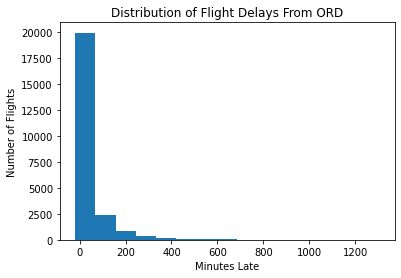

In [171]:
# YOUR CODE HERE
plt.title('Distribution of Flight Delays From ORD')
plt.xlabel('Minutes Late')
plt.ylabel('Number of Flights')
ord_flights = flights[flights['ORIGIN'] == 'ORD']['DELAY_DEP']
plt.hist(ord_flights[~np.isnan(ord_flights)], bins=15)

(array([1316.,   89.,   37.,   20.,    8.,    3.,    0.,    2.,    2.,
           4.,    0.,    0.,    0.,    0.,    2.]),
 array([ -17.,   76.,  169.,  262.,  355.,  448.,  541.,  634.,  727.,
         820.,  913., 1006., 1099., 1192., 1285., 1378.]),
 <a list of 15 Patch objects>)

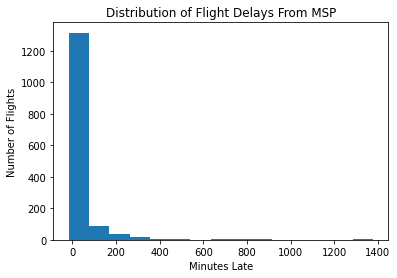

In [172]:
# YOUR CODE HERE
plt.title('Distribution of Flight Delays From MSP')
plt.xlabel('Minutes Late')
plt.ylabel('Number of Flights')
msp_flights = flights[flights['ORIGIN'] == 'MSP']['DELAY_DEP']
plt.hist(msp_flights[~np.isnan(msp_flights)], bins=15)

Present the mean, standard deviation, and 5-number summary of the arrival delays for ORD and MSP.

In [173]:
# YOUR CODE HERE
arrDelay_ORD = ord_flights
arrDelay_MSP = msp_flights

Mean_Ord = stats.mean(arrDelay_ORD[~np.isnan(arrDelay_ORD)]) 
Std_Ord = np.std(arrDelay_ORD)
Summary_Ord = arrDelay_ORD.describe()

Mean_Msp = stats.mean(arrDelay_MSP[~np.isnan(arrDelay_MSP)]) 
Std_Msp = np.std(arrDelay_MSP)
Summary_Msp = arrDelay_MSP.describe()





### END SOLUTION

print("Arrival Delay for flights arriving in ORD")
print(arrDelay_ORD.head())
print(" Mean:    ", Mean_Ord)
print(" Std Dev: ", Std_Ord)
print(Summary_Ord)

print("\nArrival Delay for flights arriving in MSP")
print(arrDelay_MSP.head())
print(" Mean:    ", Mean_Msp)
print(" Std Dev: ", Std_Msp)
print(Summary_Msp)

Arrival Delay for flights arriving in ORD
0    24.0
1     3.0
2   -10.0
3     0.0
4     0.0
Name: DELAY_DEP, dtype: float64
 Mean:     32.54532194207126
 Std Dev:  83.19967658022408
count    23995.000000
mean        32.545322
std         83.201410
min        -20.000000
25%         -4.000000
50%          0.000000
75%         25.000000
max       1306.000000
Name: DELAY_DEP, dtype: float64

Arrival Delay for flights arriving in MSP
26254   -9.0
26352    0.0
26402   -9.0
26591   -4.0
26592   -2.0
Name: DELAY_DEP, dtype: float64
 Mean:     25.290627107215105
 Std Dev:  99.65238888623226
count    1483.000000
mean       25.290627
std        99.686004
min       -17.000000
25%        -6.000000
50%        -3.000000
75%         5.000000
max      1378.000000
Name: DELAY_DEP, dtype: float64


### Q6 (10 pts) - Flight Delays to CMX 

For the flights from CMX -> ORD, Houghton to Chicago, and from ORD -> CMX, calculate the mean, standard deviation, and 5-number summary of the arrival delay. Also, plot the distribution of arrival delays for both flights in one plot (the histograms should be overlapping). 


In [174]:
# YOUR CODE HERE
fl_toCMX = flights[(flights['DEST'] == 'CMX') & (flights['ORIGIN'] == 'ORD')]['DELAY_ARR']
fl_fromCMX = flights[(flights['ORIGIN'] == 'CMX') & (flights['DEST'] == 'ORD')]['DELAY_ARR']

Mean_toCMX = stats.mean(fl_toCMX[~np.isnan(fl_toCMX)]) 
Std_toCMX = np.std(fl_toCMX)
Summary_toCMX = fl_toCMX.describe()

Mean_fromCMX = stats.mean(fl_fromCMX[~np.isnan(fl_fromCMX)]) 
Std_fromCMX = np.std(fl_fromCMX)
Summary_fromCMX = fl_fromCMX.describe()
### END SOLUTION

print("Arrival Delay for flights ORD - CMX")
print(fl_toCMX.head())
print(" Mean:    ", Mean_toCMX)
print(" Std Dev: ", Std_toCMX)
print(Summary_toCMX)

print("\nArrival Delay for flights CMX - ORD")
print(fl_fromCMX.head())
print(" Mean:    ", Mean_fromCMX)
print(" Std Dev: ", Std_fromCMX)
print(Summary_fromCMX)

Arrival Delay for flights ORD - CMX
14       1.0
24       0.0
162    -11.0
172      0.0
9187     0.0
Name: DELAY_ARR, dtype: float64
 Mean:     8.208333333333334
 Std Dev:  40.04890673358706
count     48.000000
mean       8.208333
std       40.472716
min      -22.000000
25%       -4.250000
50%        0.000000
75%        0.000000
max      223.000000
Name: DELAY_ARR, dtype: float64

Arrival Delay for flights CMX - ORD
26216   -12.0
26233   -21.0
26363     6.0
26380     1.0
35657   -22.0
Name: DELAY_ARR, dtype: float64
 Mean:     29.25
 Std Dev:  77.13583797431646
count     48.000000
mean      29.250000
std       77.952113
min      -30.000000
25%      -14.250000
50%        0.000000
75%       48.500000
max      326.000000
Name: DELAY_ARR, dtype: float64


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


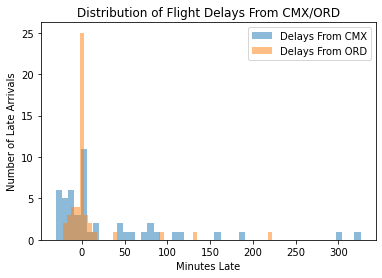

In [175]:
'''plot the distribution of arrival delays overlapping in one plot''' 

# YOUR CODE HERE
plt.title('Distribution of Flight Delays From CMX/ORD')
plt.xlabel('Minutes Late')
plt.ylabel('Number of Late Arrivals')
plt.hist(fl_fromCMX, alpha=0.5, label='Delays From CMX', bins=50)
plt.hist(fl_toCMX, alpha=0.5, label='Delays From ORD', bins=50)
plt.legend(loc='upper right')
plt.show()

## Part 2 - Inferential Statistics 



### Q7 (10 pts) - Populations 

Each of the following processes involves sampling from a population. Please identify/define the *population* for each process.  What is the *parameter* that is of interest?

1. A company runs a chemical process 20 times; the yield is measured each time.
2. A pollster samples 1000 registered voters in Michigan, and asks them which candidate they support for president.
3. A clinical trial seeks to determine if a new drug lowers cholesterol.  100 people with high cholesterol levels are recruited try the new drug.
4. Eight concrete polymers are produced using a new formulation, and the compressive strength of each is measured.
5. A quality engineer needs to estimate the percentage of bolts, manufactured on a certain day, that meets a strength specification.  At 3 pm in the afternoon, he samples the last 100 bolts to be manufactured.

#### Q7 - Answer 

**Your answer** 

1. The number of processes run is the population and the parameter of interest is the yield
2. The 1000 registered voters is the population and the parameter of interest is who the voter supports as president
3. The 100 people with high colesterol is the population and the parameter of interest is whether the drug lowers cholesterol
4. The eight concrete polymers is the population and the paremeter of interest is the compressive strength
5. The last 100 bolts is the population and the parameter of interest is the percentage of bolts that meet the strength specification in a day

### Q8 (20 pts) - Analysis of Concrete 

We will make use of the concrete data set, https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength, which measures as it's input various ingredients and age, and as an output, the compressive strength of the concrete. For your convenience, I have put a csv file of the data in under data/concrete.csv. Otherwise practice how to import an Excel file with `read_excel()`.

In [211]:
# Load in data 
colHeaders = ["Cement", "BFSlag", "FlyAsh", "Water", "SuperP", 
             "CourseAgg.", "FineAgg.", "Age", "Comp.Str."]
concrete = pd.read_csv(r'data/concrete.csv', names=colHeaders)
print(concrete.head())
concrete.shape


                                      Cement  ...                                         Comp.Str.
0  Cement (component 1)(kg in a m^3 mixture)  ...  Concrete compressive strength(MPa, megapascals) 
1                                     540.0   ...                                            79.99 
2                                     540.0   ...                                            61.89 
3                                     332.5   ...                                            40.27 
4                                     332.5   ...                                            41.05 

[5 rows x 9 columns]


(1031, 9)

##### Q8A

Describe the data set using some of the tools that we have learned in Chapter 2 and 3. I'm intentionally leaving this vague as one wants to be as complete, but concise as possible. You may (and should) visualize as appropriate.

Description of Concrete Compression Strength Data
1    79.99
2    61.89
3    40.27
4    41.05
5    44.30
Name: Comp.Str., dtype: float64
 Mean:     35.817961165048544
 Std Dev:  16.697630409134256
count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: Comp.Str., dtype: float64
689    2.33
706    3.32
653    4.57
669    4.78
718    4.83
Name: Comp.Str., dtype: float64


(array([  8.,  37.,  60.,  73.,  54., 102.,  72., 109.,  87., 109.,  68.,
         44.,  56.,  44.,  32.,  20.,  19.,  17.,   9.,   9.]),
 array([ 2.33  ,  6.3435, 10.357 , 14.3705, 18.384 , 22.3975, 26.411 ,
        30.4245, 34.438 , 38.4515, 42.465 , 46.4785, 50.492 , 54.5055,
        58.519 , 62.5325, 66.546 , 70.5595, 74.573 , 78.5865, 82.6   ]),
 <a list of 20 Patch objects>)

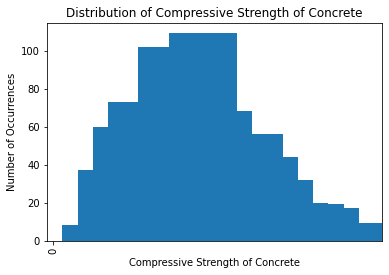

In [233]:
### Add you visualizations and statistics here ...

data = concrete['Comp.Str.'].iloc[1:].apply(float)
mean_concrete = stats.mean(data) 
std_concrete = np.std(data)
summary_concrete = data.describe()


print("Description of Concrete Compression Strength Data")
print(data.head())
print(" Mean:    ", mean_concrete)
print(" Std Dev: ", std_concrete)
print(summary_concrete)

data = data.iloc[1:].sort_values(ascending=True)
print(data.head())

plt.title('Distribution of Compressive Strength of Concrete')
plt.xticks(np.arange(0,1000, 100), rotation='vertical')
plt.xlabel('Compressive Strength of Concrete')
plt.ylabel('Number of Occurrences')
plt.hist(data, bins=20, width=10)


#### Q8B 

State, in your own words/understanding, the central limit theorem.

##### Q8B - Answer 


**Your Answer**
The central limit theorem states that if you take enough random samples from a skewed distribution, the distribution of the random samples will be approximately normally distributed. 

#### Q8C 

Run a numerical experiment, using the compressive strength variable, that demonstrates the central limit theorem at work.

In [192]:
concrete.shape

(1031, 9)

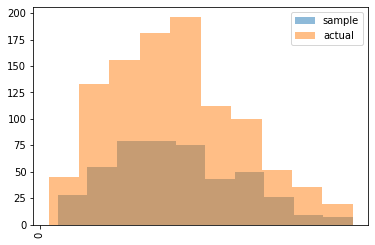

In [250]:
# Your solution 
n = 450
comp_str = concrete['Comp.Str.'].iloc[1:].apply(float)
obs = np.random.choice(comp_str.index.values, n)
sample_concrete = comp_str.loc[obs]
plt.xticks(np.arange(0,1000, 100), rotation='vertical')
plt.hist(sample_concrete, alpha=0.5, label = 'sample')
plt.hist(comp_str, alpha=0.5, label = 'actual')
plt.legend(loc='upper right')
plt.show()